## **Importing Libraries**

In [ ]:
!pip install keras

In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import pandas as pd

## **Setting the Parameters**

In [ ]:
directory_root = "./drive/MyDrive/AREPS/data/train"

In [ ]:
EPOCHS = 50
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3


In [ ]:
text_data = pd.read_csv('./drive/MyDrive/AREPS/data/train.csv')

In [ ]:
text_data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [ ]:
text_data.columns

Index(['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur',
       'Pawpularity'],
      dtype='object')

In [ ]:
# for score in text_data['Pawpularity']:
#   print(range(score))

for index, value in enumerate(text_data['Pawpularity']):
  if 0 < value <= 20:
    text_data['Pawpularity'][index] = 0
  elif 20 < value <= 40:
    text_data['Pawpularity'][index] = 1
  elif 40 < value <= 60:
    text_data['Pawpularity'][index] = 2
  elif 60 < value <= 80:
    text_data['Pawpularity'][index] = 3
  elif 80 < value <= 100:
    text_data['Pawpularity'][index] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-pa

In [ ]:
text_data['Pawpularity']

0       3
1       2
2       1
3       0
4       3
       ..
9907    0
9908    3
9909    0
9910    0
9911    1
Name: Pawpularity, Length: 9912, dtype: int64

## **Image Preprocessing**



1.   Converting image to array.
2.   Normalizing the pixel values.
3.   Data Augmentation by
     *   Rotating the images by 25 degrees.
     *   Shear (changing perception angles) (0.2 range).
     *   Zooming (0.2 range)
     *   Performing horizontal and vertical flip.















In [ ]:
# Converts images to arrays.
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
# Loading the images and append the image and label arrays to lists.
image_list, label_list = [], []
# try:
print("[INFO] Loading images ...")
root_dir = listdir(directory_root)
for image,i in zip(root_dir,range(len(root_dir))):
  print("Processing image {}/{}".format(i+1,len(root_dir)))
  image_directory = f"{directory_root}/{image}"
  if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
    #print(image[:-4])
    for id, paw in zip(text_data['Id'], text_data['Pawpularity']):
      if image[:-4] == id:
        label_list.append(paw)
    image_list.append(convert_image_to_array(image_directory))
    # print("[INFO] Image loading completed")  


Streaming output truncated to the last 5000 lines.
Processing image 4913/9912
Processing image 4914/9912
Processing image 4915/9912
Processing image 4916/9912
Processing image 4917/9912
Processing image 4918/9912
Processing image 4919/9912
Processing image 4920/9912
Processing image 4921/9912
Processing image 4922/9912
Processing image 4923/9912
Processing image 4924/9912
Processing image 4925/9912
Processing image 4926/9912
Processing image 4927/9912
Processing image 4928/9912
Processing image 4929/9912
Processing image 4930/9912
Processing image 4931/9912
Processing image 4932/9912
Processing image 4933/9912
Processing image 4934/9912
Processing image 4935/9912
Processing image 4936/9912
Processing image 4937/9912
Processing image 4938/9912
Processing image 4939/9912
Processing image 4940/9912
Processing image 4941/9912
Processing image 4942/9912
Processing image 4943/9912
Processing image 4944/9912
Processing image 4945/9912
Processing image 4946/9912
Processing image 4947/9912
Proc

In [ ]:
len(label_list), len(image_list)

(9912, 9912)

In [ ]:
image_size = len(image_list)
# Converting the labels to binary arrays.
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
# Saving the transformed labels.
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
# with open("image_list.txt", "wb") as fp:   
#   pickle.dump(image_list, fp)

In [ ]:
# with open("label_list.txt","wb") as fq:
#   pickle.dump(label_list, fq)

In [ ]:
# Normalizing the pixel values by diving with 225.0.
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
# Splitting the data into train and test sets with 80:20 ratio.
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state=42) 

In [ ]:
aug = ImageDataGenerator(horizontal_flip=True)

## **Creating the CNN model with 5 layers.**

In [ ]:
model_cnn = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model_cnn.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model_cnn.add(Activation("relu"))
model_cnn.add(BatchNormalization(axis=chanDim))
model_cnn.add(MaxPooling2D(pool_size=(3, 3)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Conv2D(64, (3, 3), padding="same"))
model_cnn.add(Activation("relu"))
model_cnn.add(BatchNormalization(axis=chanDim))
model_cnn.add(Conv2D(64, (3, 3), padding="same"))
model_cnn.add(Activation("relu"))
model_cnn.add(BatchNormalization(axis=chanDim))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Conv2D(128, (3, 3), padding="same"))
model_cnn.add(Activation("relu"))
model_cnn.add(BatchNormalization(axis=chanDim))
model_cnn.add(Conv2D(128, (3, 3), padding="same"))
model_cnn.add(Activation("relu"))
model_cnn.add(BatchNormalization(axis=chanDim))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(1024))
model_cnn.add(Activation("relu"))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(n_classes))
model_cnn.add(Activation("softmax"))

In [ ]:
# Model Summary
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        1

In [ ]:
import tensorflow as tf

In [ ]:
# Initializing Adam Optimizer.
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# Choosing BCE loss and Accuracy as the metric.
model_cnn.compile(optimizer = opt, loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.metrics.RootMeanSquaredError()])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Traing the model.
history_cnn = model_cnn.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
247/247 [==============================] - 222s 892ms/step - loss: 0.1970 - root_mean_squared_error: 0.4439 - val_loss: 0.1757 - val_root_mean_squared_error: 0.4192
Epoch 2/50
247/247 [==============================] - 220s 890ms/step - loss: 0.1589 - root_mean_squared_error: 0.3986 - val_loss: 0.1457 - val_root_mean_squared_error: 0.3817
Epoch 3/50
247/247 [==============================] - 217s 880ms/step - loss: 0.1531 - root_mean_squared_error: 0.3913 - val_loss: 0.1604 - val_root_mean_squared_error: 0.4005
Epoch 4/50
247/247 [==============================] - 218s 882ms/step - loss: 0.1498 - root_mean_squared_error: 0.3871 - val_loss: 0.2015 - val_root_mean_squared_error: 0.4489
Epoch 5/50
247/247 [==============================] - 216s 876ms/step - loss: 0.1476 - root_mean_squared_error: 0.3842 - val_loss: 0.1733 - val_root_mean_squared_error: 0.4162
Epoch 6/50
247/247 [==============================] - 217s 877ms/step - loss: 0.1452 - root_mean_squared_error: 0.3810 -

In [ ]:
# Saving the model for future use.
model_cnn.save('./drive/MyDrive/AREPS/data/pretrained_models/CNN')

INFO:tensorflow:Assets written to: ./drive/MyDrive/AREPS/data/pretrained_models/CNN/assets


## **CNN Results**



*   Training/ Validation accuracy Vs. Epochs
*   Training/ Validation accuracy Vs. Epochs



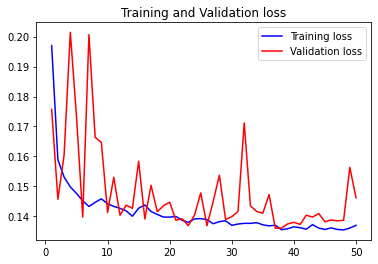

In [ ]:
# acc = history_cnn.history['accuracy']
# val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(1, len(loss) + 1)
# plt.plot(epochs, acc, 'b', label='Training accurarcy')
# plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
# plt.title('Training and Validation accurarcy')
# plt.legend()
# plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
# Calculating the test accuracy.
print("The test accuracy is: \n")
loss, rmse = model_cnn.evaluate(x_test, y_test, verbose=0)


In [ ]:
len(x_test)

1983

## **Local Explanation using LIME.**

In [ ]:
!pip install lime

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random


  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


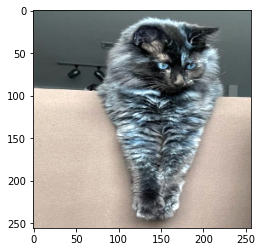

In [ ]:
# Initializing the LIME explainer.
explainer = lime_image.LimeImageExplainer()
# Applying LIME to one of the images in the test set.
test_image = convert_image_to_array('./drive/MyDrive/AREPS/data/pet_cat.jpeg')
# explanation = explainer.explain_instance((x_test[0]*255.0).astype('uint8'), model_cnn.predict)
explanation = explainer.explain_instance((test_image/225.0).astype('double'), model_cnn.predict)
# Displaying the original image.
plt.imshow((test_image/225.0).astype('double'))


In [ ]:
# Creating the LIME mask on the image.
image, mask = explanation.get_image_and_mask(
         model_cnn.predict(
              test_image.astype('uint8').reshape((1,256,256,3)
         )).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)

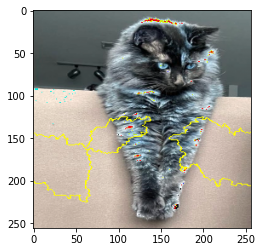

In [ ]:
# Displayint the image after applying LIME. 
# The yellow part indicates the region which contributed in the prediction.
plt.imshow(mark_boundaries((image*255).astype('uint8'), mask))

In [ ]:
# The predicted label for the above image.
label_binarizer.inverse_transform(model_cnn.predict(test_image.astype('uint8').reshape((1,256,256,3))))

array([1])

## **Transfer Learning using Keras**

Source: https://keras.io/guides/transfer_learning/

The workflow is: 
1. Taking layers from previously trained models.
2. Freezing them so as to avoid destroying any of the information they contain during future training rounds.
3. Add new trainable layers on the top of the frozen layers. They will learn to turn the old features into predictions on the new dataset.
4. Training new layers on our dataset.

In this project,
I will be using InceptionV3 model model through transfer learning and using pretrained imagenet weights.

## **Training the InceptionV3 model**

In [ ]:
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the InceptionV3 model and using the pretrained imagenet weights.
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(256, 256, 3))
                             
# Applying global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model_inception = Model(inputs=base_inception.input, outputs=predictions)

# Freezing the layers.
for layer in base_inception.layers:
    layer.trainable = False
     
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model_inception.compile(optimizer = opt, loss = "binary_crossentropy", metrics = [tf.keras.metrics.RootMeanSquaredError(),"accuracy"])
model_inception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_inception = model_inception.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=2, verbose=1
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/2
247/247 [==============================] - 141s 570ms/step - loss: 0.1157 - root_mean_squared_error: 0.1842 - accuracy: 0.8882 - val_loss: 0.9961 - val_root_mean_squared_error: 0.4589 - val_accuracy: 0.4019
Epoch 2/2
247/247 [==============================] - 139s 562ms/step - loss: 0.1136 - root_mean_squared_error: 0.1813 - accuracy: 0.8902 - val_loss: 0.9796 - val_root_mean_squared_error: 0.4593 - val_accuracy: 0.4014


In [ ]:
# Saving the model for future use.
model_inception.save('./drive/MyDrive/AREPS/data/pretrained_models/InceptionV3')

INFO:tensorflow:Assets written to: ./drive/MyDrive/AREPS/data/pretrained_models/InceptionV3/assets


## InceptionV3 Results

In [ ]:
acc = history_inception.history['accuracy']
val_acc = history_inception.history['val_accuracy']
loss = history_inception.history['loss']
val_loss = history_inception.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
# Calculating the test accuracy.
print("The test accuracy is: \n")
print(model_inception.evaluate(x_test, y_test))


The test accuracy is: 

62/62 [==============================] - 27s 425ms/step - loss: 0.9796 - root_mean_squared_error: 0.4593 - accuracy: 0.4014
[0.9795657992362976, 0.4593140184879303, 0.4014120101928711]


In [ ]:
!pip install lime

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

     |████████████████████████████████| 275 kB 5.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=158b516602ef31577ee1b100496208e85ee1b38bdff9d7d7b4c22eb1aef02690
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


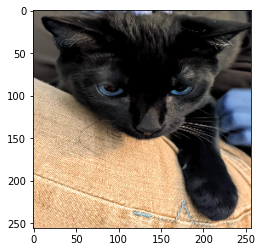

In [ ]:
# Initializing the LIME explainer.
explainer = lime_image.LimeImageExplainer()
# Applying LIME to one of the images in the test set.
test_image = convert_image_to_array('./drive/MyDrive/AREPS/data/beans.jpeg')
# explanation = explainer.explain_instance((x_test[0]*255.0).astype('uint8'), model_cnn.predict)
explanation = explainer.explain_instance((test_image/225.0).astype('double'), model_inception.predict)
# Displaying the original image.
plt.imshow((test_image/225.0).astype('double'))


In [ ]:
# Creating the LIME mask on the image.
image, mask = explanation.get_image_and_mask(
         model_inception.predict(
              test_image.astype('uint8').reshape((1,256,256,3)
         )).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)

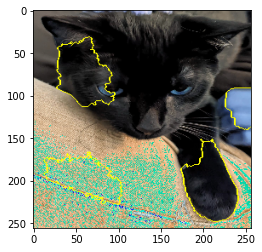

In [ ]:
plt.imshow(mark_boundaries((image*255.0).astype('uint8'), mask))

In [ ]:
label_binarizer.inverse_transform(model_inception.predict(test_image.astype('uint8').reshape((1,256,256,3))))

array([1])